### Running some basic analysis on the data

This script runs some basic analysis on the data and also creates the Transition probability matrix.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [7]:
#Function that takes a list with counts and calculates the corresponding probabilities
def probs_out_of_counts(array_counts):
    sum_count = array_counts.sum()
    factor = 100/sum_count
    array_probs = []
    for i in array_counts:
        array_probs.append(i*factor)
    return array_probs


days = ["monday", "tuesday", "wednesday", "thursday", "friday"]
data_days = {}

for i, j in enumerate(days):
    data_days[days[i]] = pd.read_csv(f"data/{j}.csv", sep=";", index_col="timestamp")
    new_list = []
    for z in data_days[days[i]]["customer_no"].values:
        new_list.append(str(z) + "_" + j)
    data_days[days[i]]["customer_no"] = new_list

for data in data_days.values():
    data.index = pd.to_datetime(data.index)

data_week = pd.concat(data_days)
data_week = data_week.reset_index(0, drop=True)

monday           customer_no
location             
checkout         1437
dairy             895
drinks            797
fruit            1005
spices            750

tuesday           customer_no
location             
checkout         1420
dairy             911
drinks            713
fruit             976
spices            694

wednesday           customer_no
location             
checkout         1526
dairy             976
drinks            775
fruit            1043
spices            730

thursday           customer_no
location             
checkout         1532
dairy             965
drinks            776
fruit            1041
spices            790

friday           customer_no
location             
checkout         1502
dairy             932
drinks            844
fruit            1057
spices            790



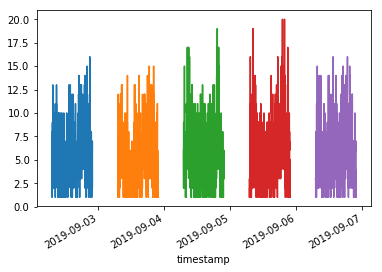

In [9]:
# SOME BASIC ANALYSIS

# Total number of customers in each section
for i in days:
    print(i, data_days[i].groupby("location").count())
    print()
# Plotting the total number of customers in each section over time - plotting every 2 hours on a Monday
mon = data_days["monday"].groupby(data_days["monday"].index).count()["location"]
mon.head(15)
mon.plot()

# Plotting the total number of customers in each section over time - plotting every 2 hours on a Tuesday
tues = data_days["tuesday"].groupby(data_days["tuesday"].index).count()["location"]
tues.head(15)
tues.plot()

# Plotting the total number of customers in each section over time - plotting every 2 hours on a Wednesday
wed = data_days["wednesday"].groupby(data_days["wednesday"].index).count()["location"]
wed.head(15)
wed.plot()

# Plotting the total number of customers in each section over time - plotting every 2 hours on a Thursday
thurs = data_days["thursday"].groupby(data_days["thursday"].index).count()["location"]
thurs.head(15)
thurs.plot()

# Plotting the total number of customers in each section over time - plotting every 2 hours on a Friday
fri = data_days["friday"].groupby(data_days["friday"].index).count()["location"]
fri.head(15)
fri.plot()

plt.savefig('customers.png')

In [10]:
# Transition Probabilities:
data_week["next_location_customer"] = data_week.groupby("customer_no")["location"].shift(-1)
P2 = pd.crosstab(data_week['location'], data_week['next_location_customer'], normalize=0)
P2

states = ["checkout", "dairy", "drinks", "fruit", "spices"]

new_df = pd.DataFrame({"checkout":[1, 0, 0, 0, 0]}, index=states)
new_df.T

P2 = P2.append(new_df.T)
P2.to_csv("probabilities.csv")
states

['checkout', 'dairy', 'drinks', 'fruit', 'spices']

In [11]:
# Which section do customers visit first after entering the supermarket?
data_week["just_entered"] = ~data_week.duplicated(subset=["customer_no"])
count_entry = data_week.groupby("just_entered").get_group(True)["location"].value_counts()
count_entry
count_entry.sum()
100/7445
1143 * 100/7445

probs_entry = probs_out_of_counts(count_entry)
probs_entry.append(0.0)
probs_entry
probs_entry_points = ["fruit", "dairy", "spices", "drinks", "checkout"]
probs_entry = pd.DataFrame(probs_entry, index=probs_entry_points, columns=["probabilities"])
probs_entry.to_csv("probabilities_entry.csv")